In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.covariance import LedoitWolf
from scipy.spatial import distance
from numpy.linalg import pinv
from scipy.stats import chi2
import seaborn as sns
import math
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#Leer datos

In [3]:
#Leer datos
df = pd.read_csv('Walmart_Sales_Clean.csv')
df.head()

,idx,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,Type
0,0,1643690.90,2136989.46,461622.22,2135143.87,317173.10,1652635.10,496725.44,1004137.09,549505.55,...,536006.73,358496.14,1230596.80,1001943.80,1086533.18,543384.01,647029.28,281090.95,890689.51,real
1,1,1641957.44,2137809.50,420728.96,2188307.39,311825.70,1606283.86,524104.92,994801.40,552677.48,...,529852.70,342214.90,1266229.07,955338.29,1075656.34,575709.96,682918.99,286857.13,656988.64,real
2,2,1611968.17,2124451.54,421642.19,2049860.26,303447.57,1567138.07,506760.54,963960.37,511327.90,...,510382.50,327237.92,1230591.97,916289.20,1052034.74,508794.87,658997.55,267956.30,841264.04,real
3,3,1409727.59,1865097.27,407204.86,1925728.84,270281.63,1432953.21,496083.24,847592.11,473773.27,...,513615.82,334222.73,1168582.02,863917.41,991941.73,491510.58,618702.79,273079.07,741891.65,real
4,4,1554806.68,1991013.13,415202.04,1971057.44,288855.71,1601348.82,491419.55,881503.95,507297.88,...,519255.68,372239.89,1266254.21,990152.28,1063557.49,554972.42,658600.05,284617.27,777951.22,real


In [4]:
#Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 47 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   idx     143 non-null    int64  
 1   1       143 non-null    float64
 2   2       143 non-null    float64
 3   3       143 non-null    float64
 4   4       143 non-null    float64
 5   5       143 non-null    float64
 6   6       143 non-null    float64
 7   7       143 non-null    float64
 8   8       143 non-null    float64
 9   9       143 non-null    float64
 10  10      143 non-null    float64
 11  11      143 non-null    float64
 12  12      143 non-null    float64
 13  13      143 non-null    float64
 14  14      143 non-null    float64
 15  15      143 non-null    float64
 16  16      143 non-null    float64
 17  17      143 non-null    float64
 18  18      143 non-null    float64
 19  19      143 non-null    float64
 20  20      143 non-null    float64
 21  21      143 non-null    float64
 22  22

## Preparación de datos para clustering

In [5]:
df_clean = df.drop(['idx', 'Type'], axis=1)

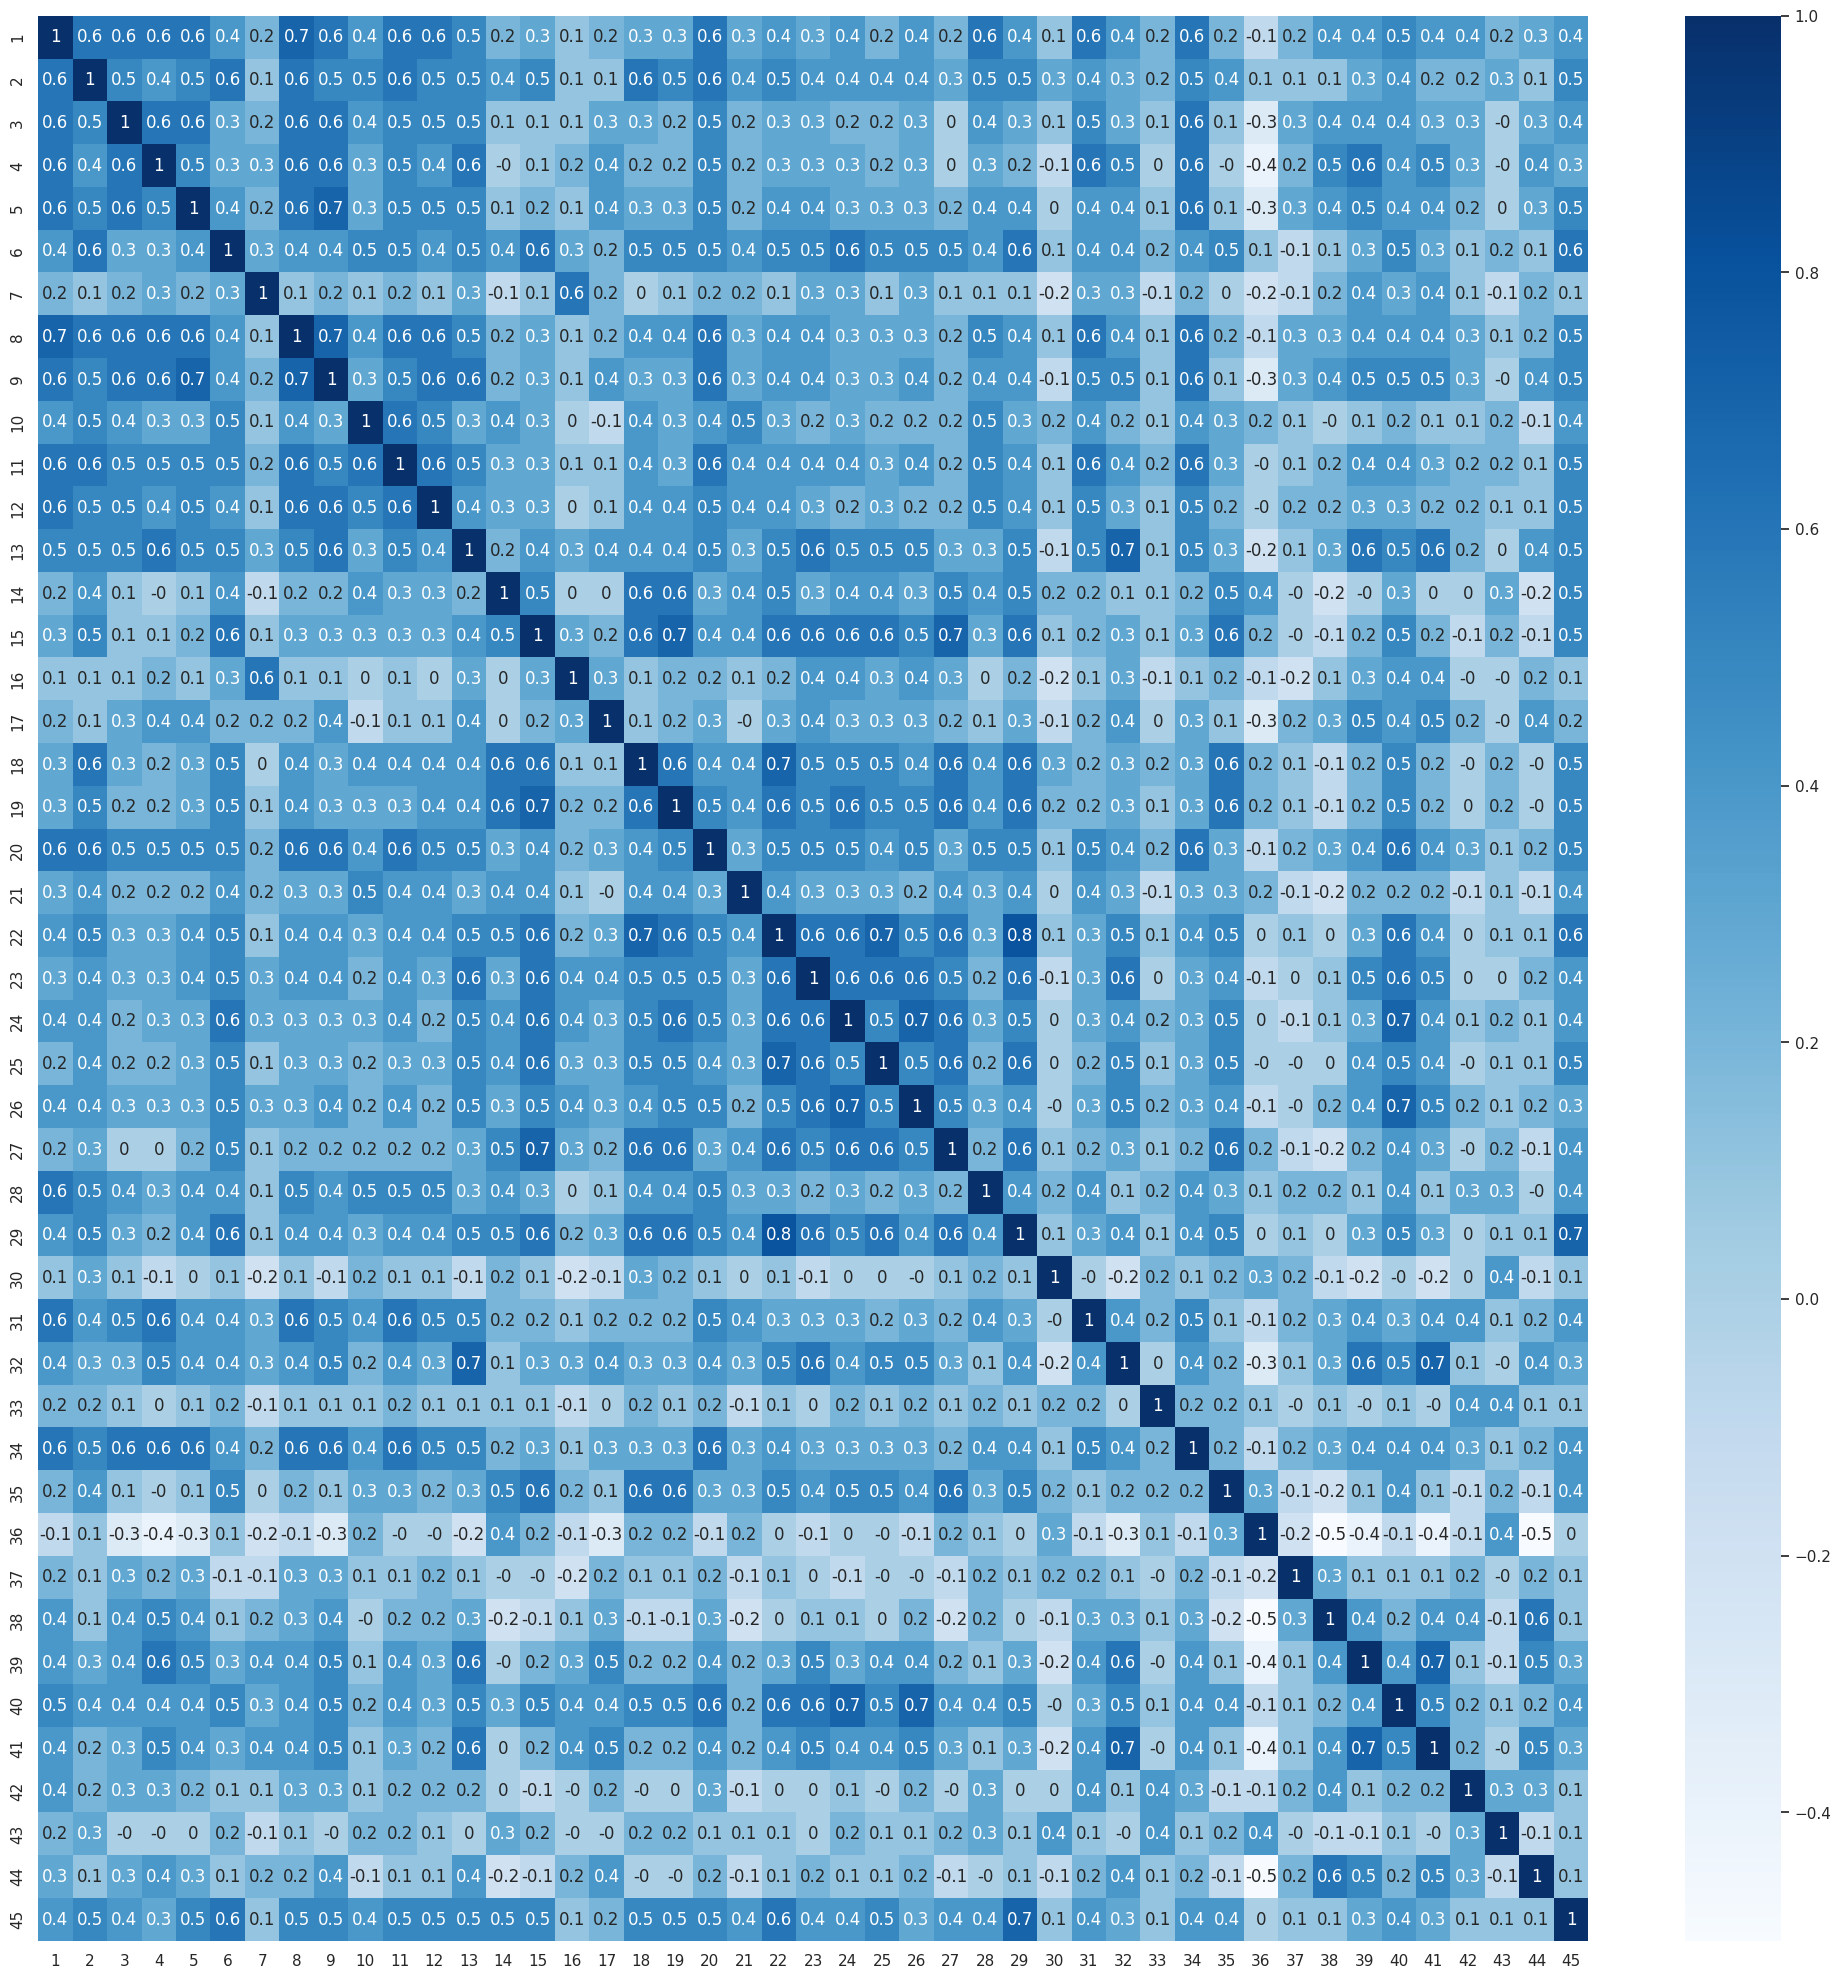

In [6]:
#Encontrar la correlacion de Kendall
df_corr = df_clean.corr(method='kendall')
sns.set(rc={'figure.figsize':(25,25)})
sns.heatmap(df_corr.round(1), annot=True, cmap="Blues")
plt.show()

In [7]:
#Matriz de correlación de Kendall
df_corr_mean = pd.DataFrame(df_corr.mean())
df_corr_mean.columns = ['mean_corr']
df_corr_mean.head()

,mean_corr
1,0.393545
2,0.400361
3,0.329249
4,0.326426
5,0.360999


In [8]:
# Convertir el dataframe en una matriz
df_data = np.array(df_clean)

In [9]:
# Crear matriz de parámetros con forma (j,k,i), donde j es el j-esimo modelo evaluado,
# k: 0 si es B0 y 1 si es B1, i: el i-ésimo elemento a evaluar
for i in range(df_data.shape[1]):
  #params_vec = np.array([])
  customer_lm = df_data[:,i]
  customer_lm = sm.add_constant(customer_lm)  
  for j in range(df_data.shape[1]):         
    rlm_model = sm.RLM(df_data[:,j],
                   customer_lm,
                   M=sm.robust.norms.Hampel()).fit()
    if j==0:
      params_vec = rlm_model.params
    else:
      params_vec = np.vstack((params_vec,rlm_model.params))
  if i == 0:
    params_matrix = params_vec 
  else:
    params_matrix = np.dstack((params_matrix,params_vec))

/usr/local/lib/python3.10/dist-packages/statsmodels/robust/robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
/usr/local/lib/python3.10/dist-packages/statsmodels/robust/robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
/usr/local/lib/python3.10/dist-packages/statsmodels/robust/robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
/usr/local/lib/python3.10/dist-packages/statsmodels/robust/robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most la

In [10]:
# Sacar la media de B0 y B1 para cada uno de los comercios
for i in range(df_data.shape[1]):
  if i==0:
    mean_vec = np.array([params_matrix[:,0,i].mean(),params_matrix[:,1,i].mean()])
  else:
    mean_vec = np.vstack((mean_vec,np.array([params_matrix[:,0,i].mean(),params_matrix[:,1,i].mean()])))

In [11]:
# Añadir la correlación a mean_vector
ro_mean = np.array(df_corr_mean['mean_corr']).reshape(-1,1)
mean_vec = np.append(mean_vec, ro_mean, axis=1)

## Modelado

In [12]:
#Instalar Spark para clusterización
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
openjdk-8-jdk-headless is already the newest version (8u372-ga~us1-0ubuntu1~20.04).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [13]:
import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

In [14]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

In [15]:
# Crear el esquema para el dataframe

df = spark.createDataFrame(mean_vec)

def set_df_columns_nullable(spark, df, column_list, nullable=False):
    for struct_field in df.schema:
        if struct_field.name in column_list:
            struct_field.nullable = nullable
    df_mod = spark.createDataFrame(df.rdd, df.schema)
    return df_mod

df = set_df_columns_nullable(spark, df, df.columns)
df = df.withColumn('features', array(df.columns))
vectors = df.rdd.map(lambda row: Vectors.dense(row.features))

df.printSchema()

root
 |-- _1: double (nullable = false)
 |-- _2: double (nullable = false)
 |-- _3: double (nullable = false)
 |-- features: array (nullable = false)
 |    |-- element: double (containsNull = false)



In [16]:
# Obtener las características
from pyspark.ml.linalg import Vectors
features = spark.createDataFrame(vectors.map(Row), ["features"])

In [17]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [18]:
rango = range(2,16)
evaluator = ClusteringEvaluator()

In [19]:
# Método del codo para obtener el k óptimo
cost = []
silhouette = []

for k in rango:
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(df)
    preds = model.transform(df)
    cost.append(model.summary.trainingCost)
    silhouette.append(evaluator.evaluate(preds))

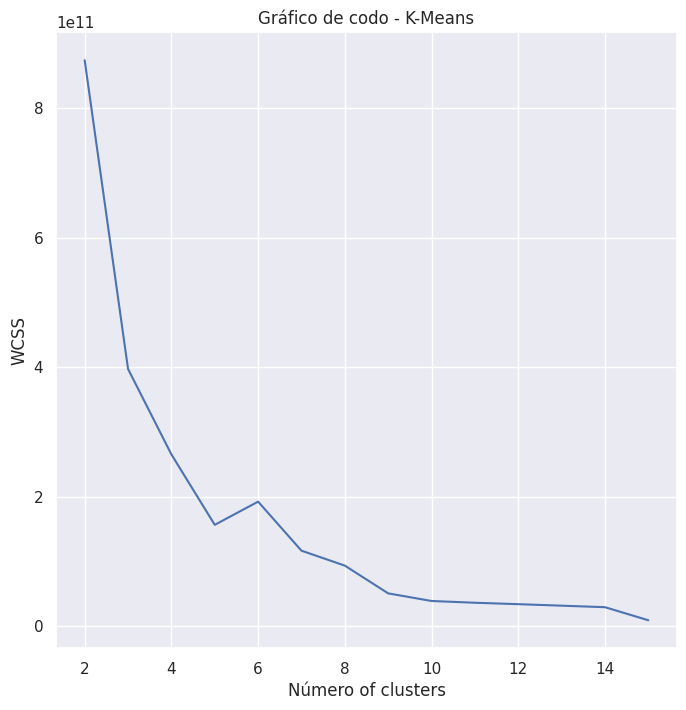

In [20]:
plt.figure(figsize=(8, 8))
plt.plot(rango, cost)
plt.title('Gráfico de codo - K-Means')
plt.xlabel('Número of clusters')
plt.ylabel('WCSS')
plt.show()

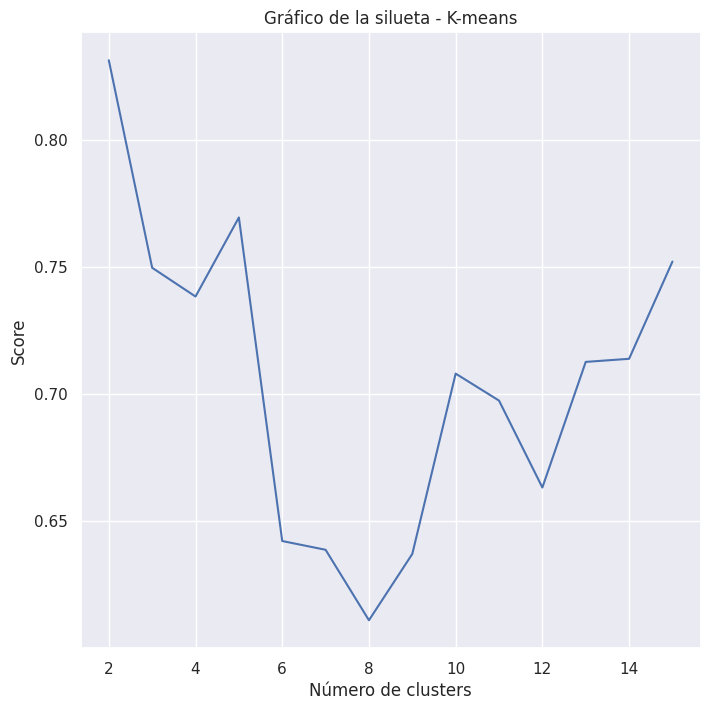

In [21]:
##Silueta para el k óptimo
plt.figure(figsize=(8, 8))
plt.plot(rango, silhouette)
plt.title('Gráfico de la silueta - K-means')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.show()


In [22]:
from pyspark.ml.clustering import BisectingKMeans

In [23]:
cost = []
silhouette = []

for k in rango:
    bkmeans = BisectingKMeans().setK(k).setSeed(1)
    model = bkmeans.fit(features)
    preds = model.transform(features)
    cost.append(model.summary.trainingCost)
    silhouette.append(evaluator.evaluate(preds))

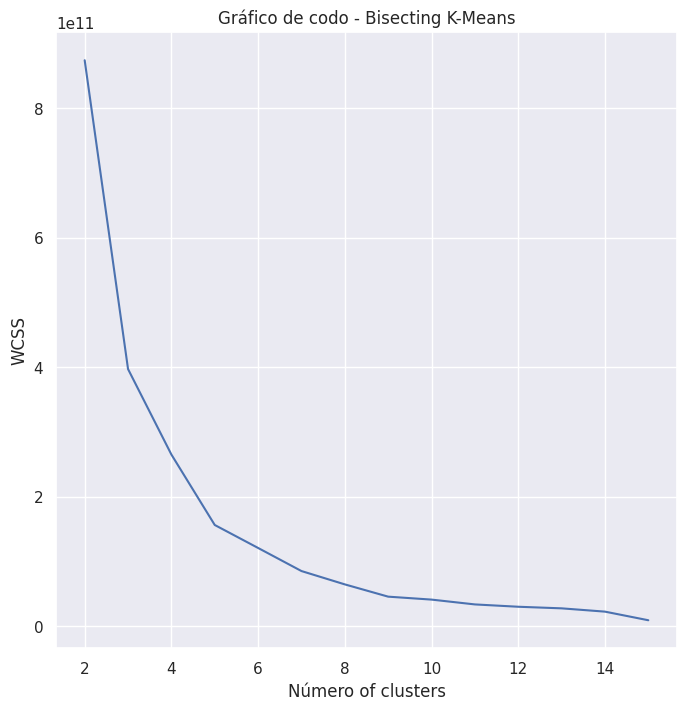

In [24]:
plt.figure(figsize=(8, 8))
plt.plot(rango, cost)
plt.title('Gráfico de codo - Bisecting K-Means')
plt.xlabel('Número of clusters')
plt.ylabel('WCSS')
plt.show()

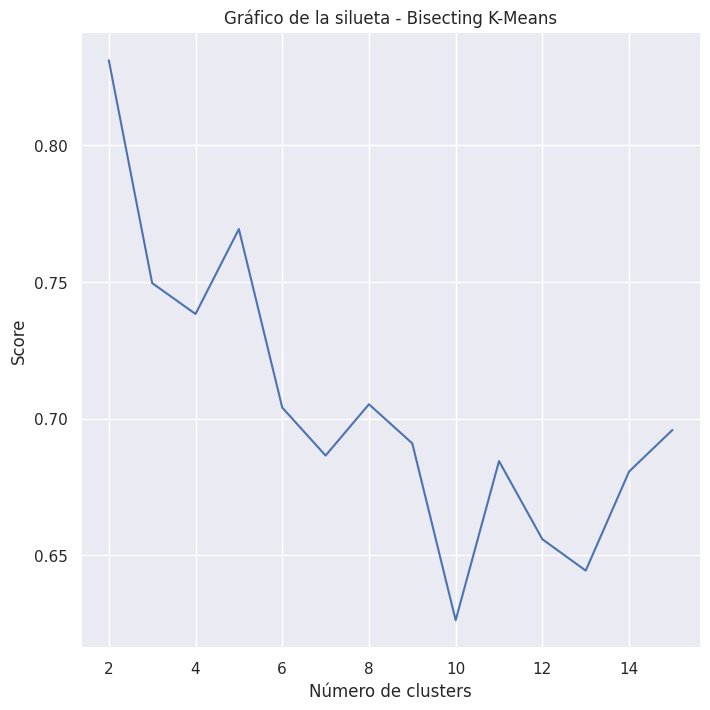

In [25]:
##Silueta para el k óptimo
plt.figure(figsize=(8, 8))
plt.plot(rango, silhouette)
plt.title('Gráfico de la silueta - Bisecting K-Means')
plt.xlabel('Número de clusters')
plt.ylabel('Score')
plt.show()

In [26]:
### Se encaja Kmeans para el mejor k
kmeans = KMeans().setK(7).setSeed(1)
model = kmeans.fit(features)
preds = model.transform(features)

A continuación, para el número de cluster optimo elegido, podemos medir su coeficiente de Silhouette, el cual nos da información de cuán bien los datos se ajustan a su cluster asignado en comparación con los demás.

In [27]:
evaluator.evaluate(preds)

0.6387739211179215

In [28]:
# Aplicar PCA para permitir la visualización en 2 dimensiones

from pyspark.ml.feature import PCA as PCAml
pca = PCAml(k=2, inputCol="features", outputCol="pca")
pca_model = pca.fit(features)
pca_transformed = pca_model.transform(features)

In [29]:
x_pca = np.array(pca_transformed.rdd.map(lambda row: row.pca).collect())

In [30]:
cluster_assignment = np.array(preds.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)

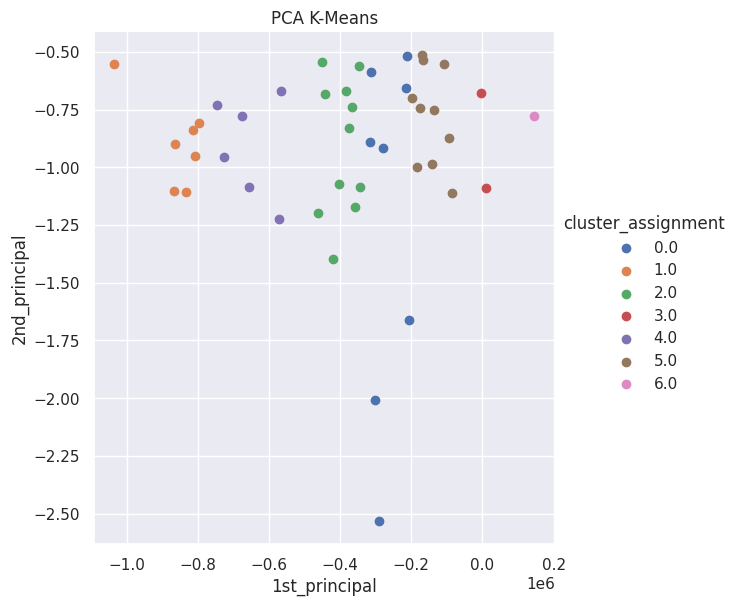

In [31]:
pca_data = np.hstack((x_pca,cluster_assignment))

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","cluster_assignment"))
sns.FacetGrid(pca_df,hue="cluster_assignment", height=6).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()
plt.title('PCA K-Means')
plt.show()

In [32]:
# Se replica el ejercicio para BisectingKMeans
bkmeans = BisectingKMeans().setK(5).setSeed(1)
model = bkmeans.fit(features)
preds = model.transform(features)

De nuevo, evaluamos el coeficiente de Silhouette, esta vez para el resultado con el Bisecting k-means, y encontramos el siguiente resultado

In [33]:
evaluator.evaluate(preds)

0.7693967894550365

Donde recordemos, que entre más cercano el valor del coeficiente de Silhouette esté de uno, indica que la muestra está bien ajustada a su cluster asignado, lo cual logra comparando la distancia intra-cluster  y la distancia inter-cluster de nuestros cúmulos. 

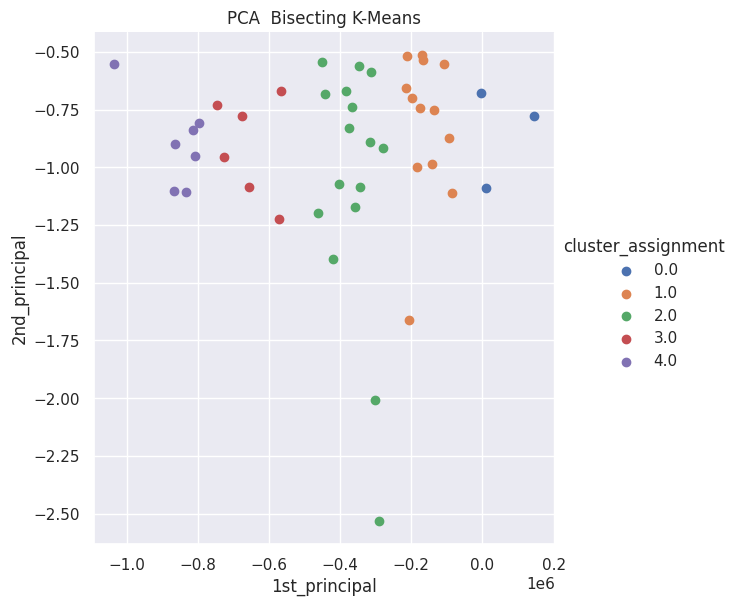

In [34]:
# Aplicar PCA para permitir la visualización en 2 dimensiones

from pyspark.ml.feature import PCA as PCAml
pca = PCAml(k=2, inputCol="features", outputCol="pca")
pca_model = pca.fit(features)
pca_transformed = pca_model.transform(features)

x_pca = np.array(pca_transformed.rdd.map(lambda row: row.pca).collect())

cluster_assignment = np.array(preds.rdd.map(lambda row: row.prediction).collect()).reshape(-1,1)

pca_data = np.hstack((x_pca,cluster_assignment))

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal","cluster_assignment"))
sns.FacetGrid(pca_df,hue="cluster_assignment", height=6).map(plt.scatter, '1st_principal', '2nd_principal' ).add_legend()
plt.title('PCA  Bisecting K-Means')
plt.show()